In [1]:
# This is after reading ?, ch2?.

In [2]:
# Instance = [Real]
# Training_datum = [Instance, Target_set]
# Training_data = [Training_datum]

# Selectors:
def instance(training_datum):
    return training_datum[0]
def target_concept(training_datum):
    return training_datum[1]

In [ ]:
from math import sqrt, inf

def distance(point_1, point_2):
    dim = len(point_1)
    return sqrt(sum([(point_1[i] - point_2[i]) ** 2 for i in range(dim)]))

In [3]:
distance([0,0], [1,1])

1.4142135623730951

In [4]:
def sort_by_func(lst, func):
    """ [a] * (a -> Real) -> [b]
    where [a] is sorted to be [b] in order of func(a), descent by default.
    """
    lst_reconstruct = [(func(item), item) for item in lst]
    get_key = lambda item: item[0]
    sorted_lst = sorted(lst_reconstruct, key = get_key, reverse=True)
    result = [item[1] for item in sorted_lst]
    return result

In [5]:
def kNN(k, training_data):
    """ Int * Training_data -> ([Real] -> Boolean)
        training_data -> (normalized_instance -> target_concept)
    """
    def kNN_result(instance0):
        distance_to_instance = lambda training_datum: distance(instance(training_datum), instance0)
        sorted_training_data = sort_by_func(training_data, distance_to_instance) # descent by default.
        nearest_training_data = sorted_training_data[-k:]
        positive_votes = [_ for _ in nearest_training_data if target_concept(_) == True]
        negative_votes = [_ for _ in nearest_training_data if target_concept(_) == False]
        if len(positive_votes) >= len(negative_votes):
            return True
        else:
            return False
    return kNN_result

In [6]:
raw_example = [[[0,0], False],
           [[0.2,0.1], False],
           [[1,1], True],
           [[1.1,2.2], True]]

In [7]:
kNN(1,raw_example)([0,0])

False

so far so good.

In [8]:
def features_max(training_data):
    """ Training_data -> [Real]
        training_data -> [max of feature for features of training_data]
    """
    dimension_of_instance_space = len(instance(training_data[0]))
    result = [-inf for i in range(dimension_of_instance_space)]
    for datum in training_data:
        for i in range(dimension_of_instance_space):
            if instance(datum)[i] > result[i]:
                result[i] = instance(datum)[i]
    return result

def features_min(training_data):
    """ Training_data -> [Real]
        training_data -> [min of feature for features of training_data]
    """
    dimension_of_instance_space = len(instance(training_data[0]))
    result = [inf for i in range(dimension_of_instance_space)]
    for datum in training_data:
        for i in range(dimension_of_instance_space):
            if instance(datum)[i] < result[i]:
                result[i] = instance(datum)[i]
    return result       

In [10]:
features_boundaries = {'min': features_min(raw_example), 'max': features_max(raw_example)}
features_boundaries

{'max': [1.1, 2.2], 'min': [0, 0]}

In [11]:
def normalize_raw_instance(raw_instance):
    """ Instance -> Instance
    """
    dimension_of_instance_space = len(raw_instance)
    result = [0 for i in range(dimension_of_instance_space)]
    for i in range(dimension_of_instance_space):
        result[i] = (raw_instance[i] - features_boundaries['min'][i]) / (features_boundaries['max'][i] - features_boundaries['min'][i])
    return result

def normalize_raw_training_data(raw_training_data):
    """ Training_data -> Training_data
    """
    result = []
    for raw_datum in raw_training_data:
        result.append([normalize_raw_instance(instance(raw_datum)), target_concept(raw_datum)])
    return result

In [15]:
inst = [1, 2.2]
normalize_raw_instance(inst)

[0.9090909090909091, 1.0]

In [16]:
normalized_example = normalize_raw_training_data(raw_example)

normalized_example

[[[0.0, 0.0], False],
 [[0.18181818181818182, 0.045454545454545456], False],
 [[0.9090909090909091, 0.45454545454545453], True],
 [[1.0, 1.0], True]]

## Show It up

In [45]:
import matplotlib.pyplot as plt
from numpy import array

plot = lambda two_dim_points, para: plt.plot([_[0] for _ in two_dim_points], [_[1] for _ in two_dim_points], para)

In [48]:
positive_instances = [_[0] for _ in normalized_example if _[1] == True]
negative_instances = [_[0] for _ in normalized_example if _[1] == False]
positive_instances

[[0.9090909090909091, 0.45454545454545453], [1.0, 1.0]]

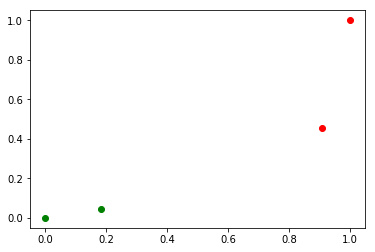

In [49]:
plot(positive_instances, 'ro')
plot(negative_instances, 'go')
plt.show()

## Play with Practical Data

### Read and Treat Raw Data

There are three elements in target set: `'didntLike'`, `'?'`, and `'?'`. However, for simplicity, we set `'didntLike'` to `False` and others to `True`.

In [88]:
data_file = open('./datingTestSet.txt', 'r')

raw_training_data = []
for line in data_file:
    raw = line.strip().split('\t')
    rearranged = [[eval(_) for _ in [raw[0], raw[1], raw[2]]], raw[3] != 'didntLike']
    raw_training_data.append(rearranged)
    
data_file.close()

In [89]:
raw_training_data[0]

[[40920, 8.326976, 0.953952], True]

In [80]:
# Normalizations:

features_boundaries = {'min': features_min(raw_training_data), 'max': features_max(raw_training_data)}
training_data = normalize_raw_training_data(raw_training_data)

### Visualizations

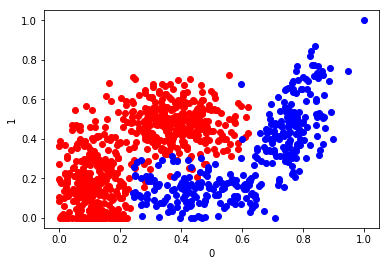

In [84]:
plot([[instance(_)[0], instance(_)[1]] for _ in training_data if target_concept(_) == True], 'ro')
plot([[instance(_)[0], instance(_)[1]] for _ in training_data if target_concept(_) == False], 'bo')
plt.xlabel('0')
plt.ylabel('1')
plt.show()

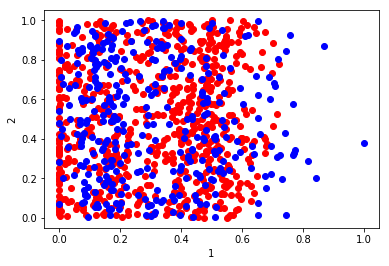

In [85]:
plot([[instance(_)[1], instance(_)[2]] for _ in training_data if target_concept(_) == True], 'ro')
plot([[instance(_)[1], instance(_)[2]] for _ in training_data if target_concept(_) == False], 'bo')
plt.xlabel('1')
plt.ylabel('2')
plt.show()

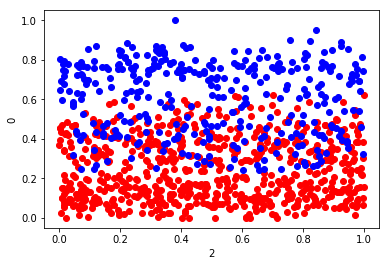

In [86]:
plot([[instance(_)[2], instance(_)[0]] for _ in training_data if target_concept(_) == True], 'ro')
plot([[instance(_)[2], instance(_)[0]] for _ in training_data if target_concept(_) == False], 'bo')
plt.xlabel('2')
plt.ylabel('0')
plt.show()

Very good!

### Play with kNN

In [92]:
normalized_test_instance = [0.5, 0.2, 0.3]

In [90]:
kNN(3, training_data)(normalized_test_instance)

False

To check, we can

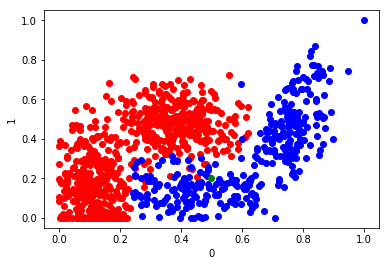

In [93]:
plot([[instance(_)[0], instance(_)[1]] for _ in training_data if target_concept(_) == True], 'ro')
plot([[instance(_)[0], instance(_)[1]] for _ in training_data if target_concept(_) == False], 'bo')
plot([normalized_test_instance[: -1]], 'go')
plt.xlabel('0')
plt.ylabel('1')
plt.show()

`False` forsooth!